**Final Project Visi Komputer**

Nama : M. Aldi Haryojudanto

NIM : 1301194025

# Install library Ultralytics

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 8.3 MB/s eta 0:00:00


# Import Dataset PKLot

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SxUZDXk5kulMrPywtFVY")
project = rf.workspace("brad-dwyer").project("pklot-1tros")
dataset = project.version(2).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninst

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.231, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PKLot-2 in yolov8:: 100%|██████████| 24844/24844 [00:05<00:00, 4812.74it/s]


In [3]:
f = open("/content/PKLot-2/data.yaml", "r")
print(f.read())

names:
- space-empty
- space-occupied
nc: 2
roboflow:
  license: CC BY 4.0
  project: pklot-1tros
  url: https://universe.roboflow.com/brad-dwyer/pklot-1tros/dataset/2
  version: 2
  workspace: brad-dwyer
test: ../test/images
train: PKLot-2/train/images
val: PKLot-2/valid/images



In [4]:
text = """
names:
- space-empty
- space-occupied
nc: 2
roboflow:
  license: CC BY 4.0
  project: pklot-1tros
  url: https://universe.roboflow.com/brad-dwyer/pklot-1tros/dataset/2
  version: 2
  workspace: brad-dwyer
test: /content/PKLot-2/test/images
train: /content/PKLot-2/train/images
val: /content/PKLot-2/valid/images
"""

with open("/content/PKLot-2/data.yaml", "w") as file:
    file.write(text)

In [5]:
f = open("/content/PKLot-2/data.yaml", "r")
print(f.read())


names:
- space-empty
- space-occupied
nc: 2
roboflow:
  license: CC BY 4.0
  project: pklot-1tros
  url: https://universe.roboflow.com/brad-dwyer/pklot-1tros/dataset/2
  version: 2
  workspace: brad-dwyer
test: /content/PKLot-2/test/images
train: /content/PKLot-2/train/images
val: /content/PKLot-2/valid/images



# Import YOLO dan model pretrained

In [6]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 303MB/s]


# Train Model

In [7]:
# Train/Fine Tuning dengan dataset yang telah di import
model.train(data='/content/PKLot-2/data.yaml', imgsz=640, epochs=50)

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/PKLot-2/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 24.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 88.3MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/PKLot-2/train/labels... 8691 images, 189 backgrounds, 0 corrupt: 100%|██████████| 8691/8691 [00:05<00:00, 1479.54it/s]


train: New cache created: /content/PKLot-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/PKLot-2/valid/labels... 2483 images, 59 backgrounds, 0 corrupt: 100%|██████████| 2483/2483 [00:03<00:00, 806.14it/s] 


val: New cache created: /content/PKLot-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.6G      1.075     0.6998      1.019        185        640: 100%|██████████| 544/544 [07:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.69it/s]


                   all       2483     143316      0.962      0.975       0.98       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.2G     0.6774     0.4087     0.8714        264        640: 100%|██████████| 544/544 [06:42<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.75it/s]

                   all       2483     143316      0.964      0.976      0.989      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.9G     0.5959     0.3806     0.8502        181        640: 100%|██████████| 544/544 [06:36<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.74it/s]


                   all       2483     143316      0.977      0.974      0.992      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.4G     0.5191     0.3423     0.8285        288        640: 100%|██████████| 544/544 [06:32<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.70it/s]


                   all       2483     143316      0.985      0.971      0.992      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G     0.4651     0.3164     0.8165        176        640: 100%|██████████| 544/544 [06:37<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.76it/s]

                   all       2483     143316      0.982      0.978      0.992      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.7G     0.4168     0.2893     0.8063        374        640: 100%|██████████| 544/544 [06:33<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.75it/s]


                   all       2483     143316      0.983      0.984      0.993      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.5G     0.3976     0.2864     0.8039        327        640: 100%|██████████| 544/544 [06:36<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.71it/s]


                   all       2483     143316       0.98      0.982      0.992      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.3G     0.3733      0.264     0.8001        239        640: 100%|██████████| 544/544 [06:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.74it/s]


                   all       2483     143316      0.982      0.985      0.993       0.97

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.95G     0.3547     0.2537      0.797        108        640: 100%|██████████| 544/544 [06:38<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.75it/s]

                   all       2483     143316      0.989      0.989      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        12G     0.3445     0.2396     0.7947        194        640: 100%|██████████| 544/544 [06:37<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.72it/s]


                   all       2483     143316      0.993      0.993      0.994      0.977

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.5G       0.33     0.2365     0.7937        144        640: 100%|██████████| 544/544 [06:36<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.75it/s]


                   all       2483     143316      0.995      0.996      0.994      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.9G       0.32     0.2262      0.792        228        640: 100%|██████████| 544/544 [06:37<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:48<00:00,  1.62it/s]


                   all       2483     143316      0.996      0.997      0.994      0.984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.3G     0.3097     0.2192     0.7908        228        640: 100%|██████████| 544/544 [06:50<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.68it/s]


                   all       2483     143316      0.997      0.997      0.995      0.983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        12G     0.3039     0.2177       0.79        251        640: 100%|██████████| 544/544 [06:37<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.75it/s]

                   all       2483     143316      0.998      0.998      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        11G     0.2891     0.2048     0.7883        203        640: 100%|██████████| 544/544 [06:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.74it/s]

                   all       2483     143316      0.998      0.998      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.6G     0.2872     0.2025      0.788        185        640: 100%|██████████| 544/544 [06:35<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.70it/s]

                   all       2483     143316      0.998      0.998      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.84G     0.2804      0.197     0.7868        235        640: 100%|██████████| 544/544 [06:51<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.69it/s]

                   all       2483     143316      0.998      0.999      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.5G     0.2764     0.1985     0.7865        290        640: 100%|██████████| 544/544 [06:41<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.71it/s]

                   all       2483     143316      0.998      0.998      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.97G      0.267     0.1868     0.7853         99        640: 100%|██████████| 544/544 [06:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:47<00:00,  1.65it/s]


                   all       2483     143316      0.998      0.999      0.995      0.991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.1G     0.2611     0.1847     0.7846        221        640: 100%|██████████| 544/544 [06:59<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.69it/s]

                   all       2483     143316      0.997      0.996      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.5G     0.2525      0.178     0.7836        245        640: 100%|██████████| 544/544 [07:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:47<00:00,  1.65it/s]

                   all       2483     143316      0.999      0.999      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.2G     0.2476     0.1751     0.7829        205        640: 100%|██████████| 544/544 [06:57<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.68it/s]

                   all       2483     143316      0.998      0.999      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.6G     0.2424     0.1705     0.7826        246        640: 100%|██████████| 544/544 [06:49<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.72it/s]

                   all       2483     143316      0.999      0.999      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.9G     0.2394     0.1694     0.7818        225        640: 100%|██████████| 544/544 [06:52<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.71it/s]

                   all       2483     143316      0.999      0.998      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.3G     0.2352     0.1662     0.7816        279        640: 100%|██████████| 544/544 [06:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.72it/s]

                   all       2483     143316      0.998      0.998      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.5G     0.2297     0.1648     0.7818        327        640: 100%|██████████| 544/544 [06:48<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.67it/s]

                   all       2483     143316      0.999      0.999      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.4G     0.2272     0.1641     0.7813        248        640: 100%|██████████| 544/544 [06:45<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:48<00:00,  1.62it/s]

                   all       2483     143316      0.998      0.999      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.5G     0.2306     0.1637     0.7816        176        640: 100%|██████████| 544/544 [06:47<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.70it/s]

                   all       2483     143316      0.999      0.999      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.1G     0.2216     0.1587     0.7806        269        640: 100%|██████████| 544/544 [06:58<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.67it/s]

                   all       2483     143316      0.999      0.999      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.7G     0.2151      0.154     0.7798        181        640: 100%|██████████| 544/544 [06:59<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.69it/s]

                   all       2483     143316      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        12G     0.2128      0.152     0.7793        509        640: 100%|██████████| 544/544 [06:56<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.72it/s]

                   all       2483     143316      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.2G     0.2072     0.1482     0.7787        195        640: 100%|██████████| 544/544 [06:54<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.68it/s]


                   all       2483     143316      0.999      0.999      0.995      0.994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.7G     0.2048     0.1469     0.7784        130        640: 100%|██████████| 544/544 [06:55<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.69it/s]

                   all       2483     143316      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.3G     0.2022     0.1442     0.7789        231        640: 100%|██████████| 544/544 [06:54<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.73it/s]

                   all       2483     143316      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.8G        0.2     0.1432     0.7783        415        640: 100%|██████████| 544/544 [06:53<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.73it/s]

                   all       2483     143316      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.3G     0.1943     0.1405     0.7773        149        640: 100%|██████████| 544/544 [06:47<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.66it/s]


                   all       2483     143316      0.999      0.999      0.995      0.994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.5G     0.1905     0.1366     0.7772        162        640: 100%|██████████| 544/544 [06:44<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.73it/s]

                   all       2483     143316      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        12G     0.1895      0.136     0.7775        314        640: 100%|██████████| 544/544 [06:41<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:46<00:00,  1.69it/s]

                   all       2483     143316      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.4G     0.1873     0.1353     0.7773        257        640: 100%|██████████| 544/544 [06:45<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.72it/s]

                   all       2483     143316      0.999      0.999      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.85G     0.1831     0.1321     0.7772        259        640: 100%|██████████| 544/544 [06:49<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:47<00:00,  1.66it/s]


                   all       2483     143316      0.999      0.999      0.995      0.994
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.43G     0.1569     0.1184     0.7668         88        640: 100%|██████████| 544/544 [06:00<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.74it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.42G     0.1513     0.1137      0.766        299        640: 100%|██████████| 544/544 [05:47<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.76it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.42G     0.1479     0.1103     0.7663        149        640: 100%|██████████| 544/544 [05:41<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.76it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       7.4G      0.145     0.1085     0.7655        240        640: 100%|██████████| 544/544 [05:43<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.74it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.41G     0.1385     0.1046     0.7647        225        640: 100%|██████████| 544/544 [05:42<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.74it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.41G     0.1353     0.1025     0.7648        168        640: 100%|██████████| 544/544 [05:39<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.71it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.41G     0.1317    0.09997     0.7645        168        640: 100%|██████████| 544/544 [05:43<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.75it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.41G     0.1281    0.09756     0.7639        239        640: 100%|██████████| 544/544 [05:40<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.70it/s]


                   all       2483     143316      0.999      0.999      0.995      0.995

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.39G     0.1254    0.09522     0.7642        240        640: 100%|██████████| 544/544 [05:39<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:44<00:00,  1.75it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.41G     0.1231    0.09338     0.7644        289        640: 100%|██████████| 544/544 [05:41<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:45<00:00,  1.71it/s]

                   all       2483     143316      0.999      0.999      0.995      0.995



50 epochs completed in 6.232 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [01:35<00:00,  1.22s/it]


                   all       2483     143316      0.999      0.999      0.995      0.995
           space-empty       2483      73629      0.999      0.999      0.995      0.995
        space-occupied       2483      69687      0.999      0.999      0.995      0.995
Speed: 0.2ms preprocess, 10.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b202e0fb3a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Model Evaluation

In [8]:
text = """
names:
- space-empty
- space-occupied
nc: 2
roboflow:
  license: CC BY 4.0
  project: pklot-1tros
  url: https://universe.roboflow.com/brad-dwyer/pklot-1tros/dataset/2
  version: 2
  workspace: brad-dwyer
test: /content/PKLot-2/test/images
train: /content/PKLot-2/train/images
val: /content/PKLot-2/test/images
"""

with open("/content/PKLot-2/data.yaml", "w") as file:
    file.write(text)

In [9]:
model.val()

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/PKLot-2/test/labels... 1242 images, 26 backgrounds, 0 corrupt: 100%|██████████| 1242/1242 [00:02<00:00, 506.03it/s]

val: New cache created: /content/PKLot-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [01:16<00:00,  1.02it/s]


                   all       1242      70684      0.998      0.998      0.995      0.995
           space-empty       1242      36584      0.998      0.997      0.995      0.995
        space-occupied       1242      34100      0.999      0.999      0.995      0.994
Speed: 0.4ms preprocess, 22.7ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b201cdb4550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [10]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-1): 2 x Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=Tr

# Eksport Results

In [11]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!zip -r /content/runs.zip /content/runs

from google.colab import files
files.download("/content/runs.zip")

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels.jpg (deflated 38%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 10%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 1%)
  adding: content/runs/detect/train/events.out.tfevents.1703996661.5670eeefd1c0.462.0 (deflated 92%)
  adding: content/runs/detect/train/train_batch21761.jpg (deflated 3%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 10%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 43%)
  adding: content/runs/detect/train/train_batch21762.jpg (deflated 4%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/R_curve.png (deflated 20%)
  adding: content/runs/detec

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Inference/Prediksi

In [12]:
model.predict('/content/PKLot-2/test/images/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg', save=True, imgsz=640)


image 1/1 /content/PKLot-2/test/images/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg: 640x640 29 space-emptys, 71 space-occupieds, 37.1ms
Speed: 1.9ms preprocess, 37.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'space-empty', 1: 'space-occupied'}
 orig_img: array([[[121, 139, 168],
         [125, 143, 172],
         [130, 147, 174],
         ...,
         [ 41, 113, 123],
         [ 46, 119, 127],
         [ 47, 120, 128]],
 
        [[122, 140, 169],
         [125, 144, 171],
         [129, 146, 173],
         ...,
         [ 47, 120, 128],
         [ 50, 123, 131],
         [ 48, 122, 128]],
 
        [[123, 142, 169],
         [124, 143, 170],
         [125, 144, 171],
         ...,
         [ 56, 128, 135],
         [ 56, 128, 135],
         [ 53, 126, 130]],
 
        ...,
 
        [[ 76,  62,  56],
         [ 76,  62,  56],
         [ 71,  59,  53],
         ...,
         [ 76,  62,  66],
         [ 70,  56,  62],
         [ 64,  50,  56]],
 
        [[ 70,  58,  52],
         [ 74,  62,  56],
         [ 72,  60,  54],
         ...,
   

Text(0.5, 1.0, 'Predicted')

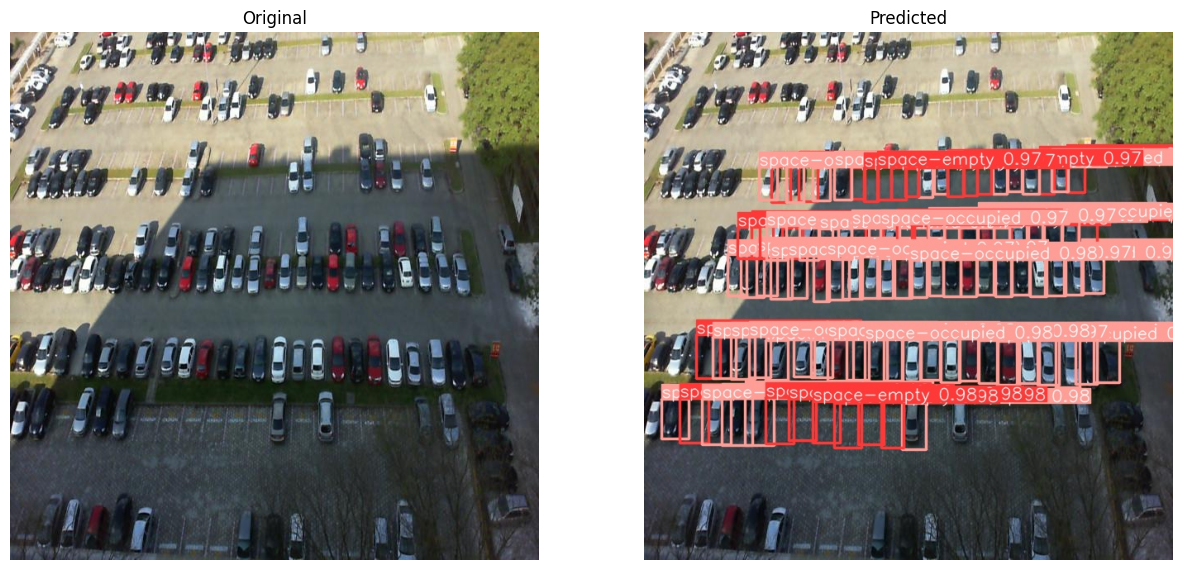

In [18]:
import cv2
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 15))

img_original = cv2.imread('/content/PKLot-2/test/images/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg')
img_predict = cv2.imread('/content/runs/detect/train3/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg')
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_predict_rgb = cv2.cvtColor(img_predict, cv2.COLOR_BGR2RGB)

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(img_original_rgb)
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)

# showing image
plt.imshow(img_predict_rgb)
plt.axis('off')
plt.title("Predicted")